In [1]:
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from skimage import data
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
file_name = list()
feature = list()
for path in os.listdir('dataset/normals_cut_224'):
    file_name.append(path)
    feature.append(data.imread(f'./dataset/normals_cut_224/{path}'))

#ds = pd.DataFrame({'filename': file_name, 'img': feature})
#ds.head(2)
len(file_name)

153

In [3]:
img = np.array(feature).reshape(len(feature), -1).astype(np.float64)
img.shape

(153, 150528)

In [4]:
np.array(feature).shape

(153, 224, 224, 3)

In [5]:
ds = pd.DataFrame({'filename': file_name, 'img': feature})
ds.head(2)

,filename,img
0,a_001.jpg,"[[[161, 84, 56], [157, 80, 52], [159, 82, 54],..."
1,a_0034.jpg,"[[[132, 60, 38], [135, 63, 41], [137, 65, 43],..."


In [6]:
ds['type'] = ds['filename'].apply(lambda x: x[0])
ds.head(2)

,filename,img,type
0,a_001.jpg,"[[[161, 84, 56], [157, 80, 52], [159, 82, 54],...",a
1,a_0034.jpg,"[[[132, 60, 38], [135, 63, 41], [137, 65, 43],...",a


In [7]:

# 3. 学習(15種類のグループにクラスタリングする)
model = KMeans(n_clusters=2).fit(img)

In [8]:

# 4. 学習結果のラベル
labels = model.labels_
labels

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1])

In [9]:
# label0: a35, h:44, label1 a47: h:28
# Acc: 44+47/154 = 0.5909
# Acc: 40+46/153 = 
count = [{'a': 0, 'h': 0} for _ in range(2)]
for i, label in enumerate(labels):
    count[label][ds['type'][i]] += 1
count
#Acc: 43.8%

[{'a': 41, 'h': 46}, {'a': 40, 'h': 26}]

In [10]:
color_code = {'a': '#FF0000', 'h': '#0000FF'}
ds['color'] = ds['type'].apply(lambda x: color_code[x])
ds.head(2)

,filename,img,type,color
0,a_001.jpg,"[[[161, 84, 56], [157, 80, 52], [159, 82, 54],...",a,#FF0000
1,a_0034.jpg,"[[[132, 60, 38], [135, 63, 41], [137, 65, 43],...",a,#FF0000


In [11]:
ds.tail(2)

,filename,img,type,color
151,h_195.jpg,"[[[241, 159, 111], [240, 156, 109], [227, 141,...",h,#0000FF
152,h_196.jpg,"[[[61, 19, 7], [74, 32, 20], [73, 31, 19], [69...",h,#0000FF


In [12]:
decomp = TSNE(n_components=2)
tsne_x = decomp.fit_transform(img)
tsne_x.shape

(153, 2)

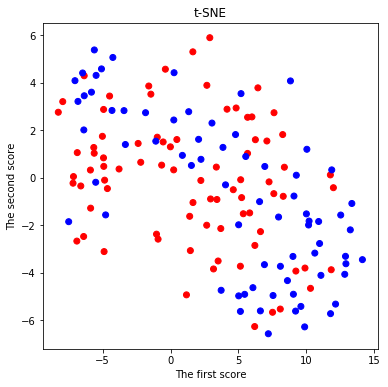

In [13]:
plt.figure(figsize=(6, 6))
plt.scatter(tsne_x[:, 0], tsne_x[:, 1], color=ds['color'])
plt.title('t-SNE')
plt.xlabel('The first score')
plt.ylabel('The second score')
plt.savefig('result/tsne/original.jpg')

In [24]:
model = KMeans(n_clusters=2).fit(tsne_x)
labels = model.labels_
count = [{'a': 0, 'h': 0} for _ in range(2)]
for i, label in enumerate(labels):
    count[label][ds['type'][i]] += 1
count
#Acc: 43.1%

[{'a': 40, 'h': 25}, {'a': 41, 'h': 47}]

In [21]:
pca = PCA().fit(img)

In [16]:
plt_img = pca.transform(img)
plt_img.shape

(153, 153)

Text(0, 0.5, 'The second principal component score')

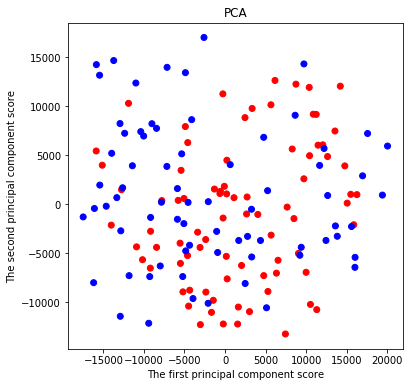

In [17]:
plt.figure(figsize=(6, 6))
plt.scatter(plt_img[:, 0], plt_img[:, 1], color=ds['color'])
plt.title('PCA')
plt.xlabel('The first principal component score')
plt.ylabel('The second principal component score')

In [23]:
model = KMeans(n_clusters=2).fit(plt_img)
labels = model.labels_
count = [{'a': 0, 'h': 0} for _ in range(2)]
for i, label in enumerate(labels):
    count[label][ds['type'][i]] += 1
count

[{'a': 42, 'h': 45}, {'a': 39, 'h': 27}]

In [ ]:
#Acc: 54.9
#Acc: 45.1%